In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_parquet("hf://datasets/sentence-transformers/wikihow/pair/train-00000-of-00001.parquet")

In [40]:
token_art  = [len(x.split()) for x in df.text]
token_rias = [len(x.split()) for x in df.summary]
length_ratios = [s / d if d > 0 else 0 for s, d in zip(token_rias, token_art)]

df = pd.DataFrame({
    "text": df.text,
    "summary": df.summary,
    "len_art": token_art,
    "len_rias": token_rias,
    "ratio": length_ratios
})

df.head()

,text,summary,len_art,len_rias,ratio
0,So you're a new or aspiring artist and your cr...,Sell Fine Art Online,36,4,0.111111
1,"If you want to be well-read, then, in the word...",Be Well Read,44,3,0.068182
2,Stage names are used by all types of performer...,Pick a Stage Name,24,4,0.166667
3,Burlesque in the U.S. is one of the few art fo...,Get More Burlesque Gigs,43,4,0.093023
4,This article describes a general idea on how t...,Get a Record Deal With Phantom City Studio,38,8,0.210526


In [41]:
df.isna().sum()

,0
text,0
summary,0
len_art,0
len_rias,0
ratio,0


In [ ]:
df['text'].duplicated().sum()

np.int64(249)

In [ ]:
df = df.drop_duplicates(subset='text', keep='first')

In [ ]:
descr_stats = df[["len_art", "len_rias", "ratio"]].describe().T
display(descr_stats)


,count,mean,std,min,25%,50%,75%,max
len_art,128294.0,34.559223,9.724899,0.0,28.000000,34.000000,40.0,141.0
len_rias,128294.0,5.171434,2.118579,1.0,4.000000,5.000000,6.0,24.0
ratio,128294.0,0.166316,0.110000,0.0,0.101695,0.142857,0.2,8.0


From the descriptive statistics we can see that some rows have to be removed due to some text not correctly loaded due to the ratio greater than 1.

Before removal keep going with the analysis

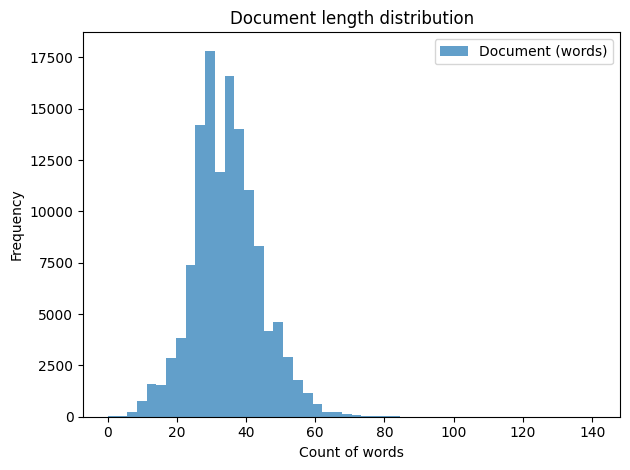

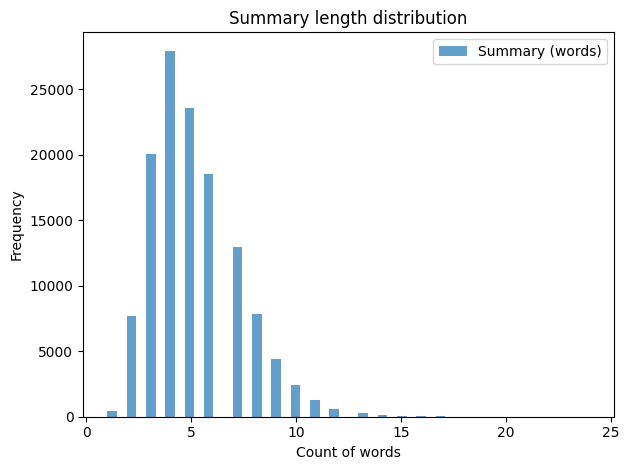

In [ ]:
fig1 = plt.figure()
plt.hist(df["len_art"], bins=50, alpha=0.7, label="Document (words)")
plt.title("Document length distribution")
plt.legend()
plt.xlabel("Count of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
fig2 = plt.figure()
plt.hist(df["len_rias"], bins=50, alpha=0.7, label="Summary (words)")
plt.title("Summary length distribution")
plt.legend()
plt.xlabel("Count of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

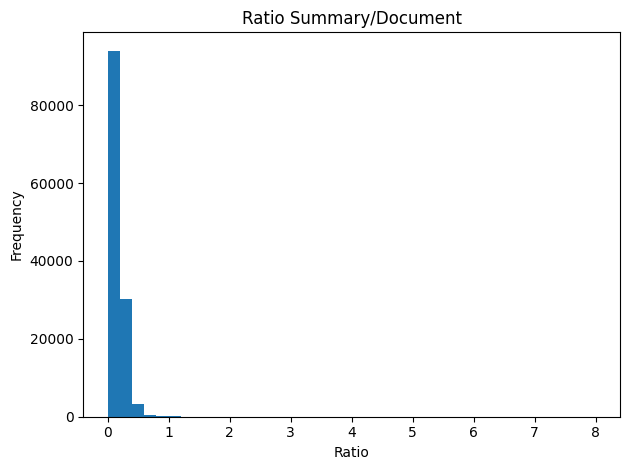

In [ ]:
fig2 = plt.figure()
plt.hist(df["ratio"], bins=40)
plt.title("Ratio Summary/Document")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

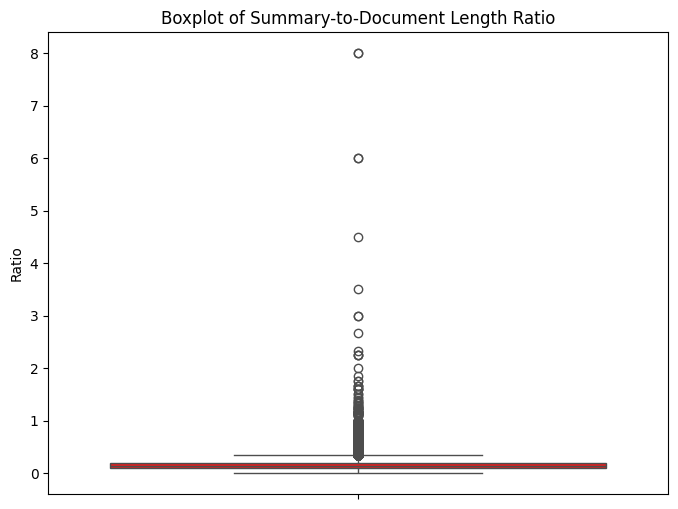

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ratio'], color= 'red')
plt.title('Boxplot of Summary-to-Document Length Ratio')
plt.ylabel('Ratio')
plt.show()

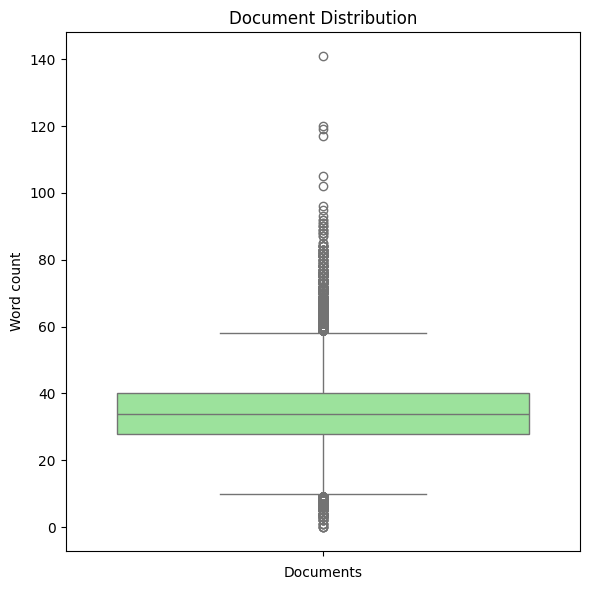

In [ ]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['len_art'], color = 'lightgreen')
plt.title('Document Distribution')
plt.ylabel('Word count')
plt.xlabel('Documents')
plt.tight_layout()
plt.show()

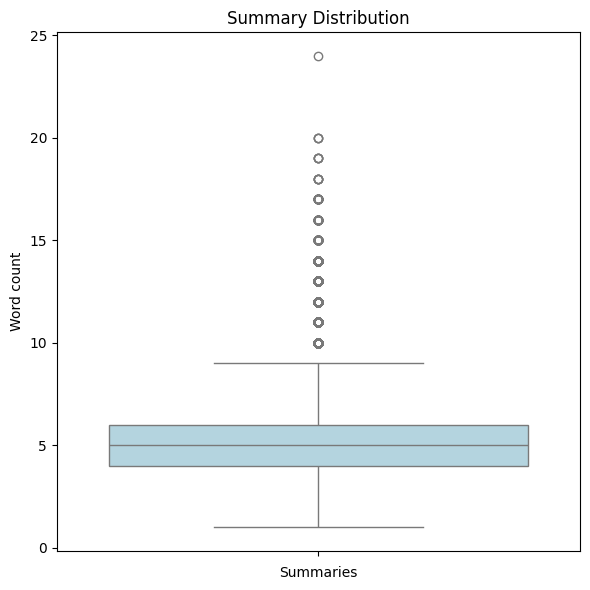

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.boxplot(y=df['len_rias'], color= 'lightblue')
plt.title('Summary Distribution')
plt.ylabel('Word count')
plt.xlabel('Summaries')
plt.tight_layout()
plt.show()

In [ ]:
df[df["ratio"] > 0.5]

,text,summary,len_art,len_rias,ratio
25,Here is how to teach and also avoid the dange...,Teach and Avoid the Dangers of Fake Faith Healers,14,9,0.642857
672,Getting braces soon and not sure what they ar...,Know What the Orthodontist Will Do when You Ge...,14,10,0.714286
1259,This article discusses the the types of anemi...,Learn and Understand the Types and Etiologies ...,16,11,0.687500
1390,Bedwetting can be very traumatic for many youn...,Involve Older Siblings With Laundering a Bedwe...,22,12,0.545455
1428,This article elaborates on and gives additiona...,Choose Pin‐On Cloth Diapers for Older Children...,23,12,0.521739
...,...,...,...,...,...
128292,"So, you found a picture that you would like t...",Download a Picture off of the Internet and Ma...,23,14,0.608696
128384,Want to be a medicine cat? Then follow these ...,Act Like a Medicine Cat from Warrior Cats,10,8,0.800000
128386,You loved the Baby-sitters Club as a kid. Why...,Cosplay As Claudia from the Baby Sitters Club,14,8,0.571429
128435,Here are some ideas for cosplaying as Axel.,Cosplay As Axel from Kingdom Hearts,8,6,0.750000


There are some documents that are loaded badly and could create possible noise, so let's go ahead and remove them

In [ ]:
df = df[df["ratio"] < 0.5]

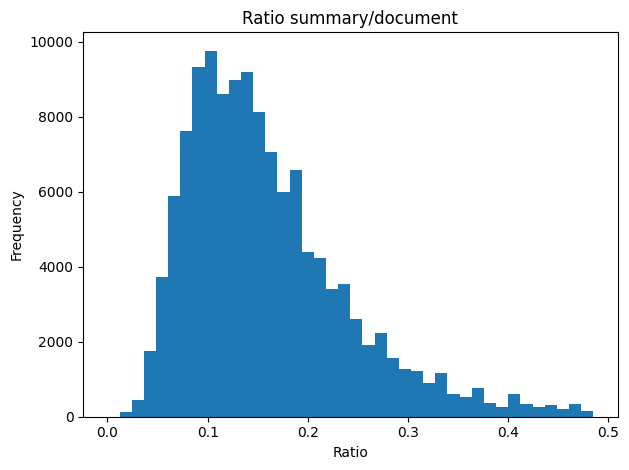

In [ ]:
fig2 = plt.figure()
plt.hist(df["ratio"], bins=40)
plt.title("Ratio summary/document")
plt.xlabel("Ratio")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [ ]:
k = 5
candidati = df.sort_values("ratio", ascending=False).head(k)

for i, row in candidati.iterrows():
    print(f"\n{'='*120}\nOriginal index: {i} | Ratio: {row.ratio:.3f} ({row.len_rias}/{row.len_art})")
    print("\n✦ Document ✦\n")
    print(row.text)
    print("\n✦ Summary ✦\n")
    print(row.summary)



Original index: 58916 | Ratio: 0.485 (16/33)

✦ Document ✦

Want a smart and invisible camera to record DVD to Zune? Want to watch your birthday video, favorites movie on Zune? Try the iLead DVD to Zune and get a fresh shooting experience.

✦ Summary ✦

Use Ilead Dvd to Zune Converter to Rip Multiple Dvds Onto Your Zune at One Time

Original index: 22133 | Ratio: 0.484 (15/31)

✦ Document ✦

A fraction containing a fraction in the numerator and denominator is a called a complex fraction. These types of expressions can be daunting, especially when they are algebraic expressions including variables.

✦ Summary ✦

Divide a Fractional Algebraic Expression by a Fractional Algebraic Expression (Using the Fractional Bar Form)

Original index: 80236 | Ratio: 0.484 (15/31)

✦ Document ✦

Ever completed several tasks on Remember the Milk and now want to share this accomplishment with your friends? Well, you can...if you have either (or both) a Facebook or Twitter account

✦ Summary ✦

Share How

In [ ]:
df = df.drop(columns=["len_art", "len_rias", "ratio"])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/nlp project/NLP_Data_Science/wikihow_clean.csv')